In [21]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
current_dir = os.path.abspath(os.getcwd())
print(f"Directorio actual: {current_dir}")

# Subir hasta el directorio raíz común (en este caso 'Analisis-de-noticias')
root_dir = os.path.abspath(os.path.join(current_dir, "../.."))
print(f"Directorio raíz común: {root_dir}")

# Construir la ruta al directorio donde están los archivos pkl
directory = os.path.join(root_dir, "src/00.data/preprocesado/")
print(f"Ruta de directorio ajustada: {directory}")

# Lista para almacenar los DataFrames
df_lista = []

# Buscar todos los archivos pkl en el directorio
archivos_pkl = [f for f in os.listdir(directory) if f.startswith("meneame_procesado_") and f.endswith(".pkl")]

# Leer cada archivo .pkl y agregarlo a la lista de DataFrames
for archivo in archivos_pkl:
    file_path = os.path.join(directory, archivo)
    with open(file_path, "rb") as f:
        df_chunk = pickle.load(f)
        df_lista.append(df_chunk)
        print(f"Cargado: {archivo} con {len(df_chunk)} filas")

# Concatenar todos los DataFrames en uno solo
df = pd.concat(df_lista, ignore_index=True)

# Verificar el tamaño del DataFrame final
print(f"DataFrame final con {df.shape[0]} filas y {df.shape[1]} columnas")

Directorio actual: C:\Users\Jordi\OneDrive - Finergal\Documentos\Bootcamp HAB Data Science\PFB\Analisis-de-noticias\src\03_01.ML
Directorio raíz común: C:\Users\Jordi\OneDrive - Finergal\Documentos\Bootcamp HAB Data Science\PFB\Analisis-de-noticias
Ruta de directorio ajustada: C:\Users\Jordi\OneDrive - Finergal\Documentos\Bootcamp HAB Data Science\PFB\Analisis-de-noticias\src/00.data/preprocesado/
Cargado: meneame_procesado_1.pkl con 100000 filas
Cargado: meneame_procesado_2.pkl con 100000 filas
Cargado: meneame_procesado_3.pkl con 87713 filas
DataFrame final con 287713 filas y 20 columnas


In [3]:
df.head(3)

,news_id,title,content,full_story_link,meneos,clicks,karma,positive_votes,anonymous_votes,negative_votes,category,comments,published_date,user,source,source_link,scraped_date,provincia,comunidad,category_encoded
0,4032594,RTVE mantiene que Mazón llegó al Cecopi antes ...,Los servicios informativos de la radio y la te...,https://meneame.net/story/rtve-mantiene-mazon-...,115,651,410,57,58,1,Política y Sociedad,30,2025-02-27 12:50:02,CosasQueLees,eldiario.es,https://www.eldiario.es/comunitat-valenciana/r...,2025-02-27 13:30:08,NaN,NaN,9.0
1,4032568,Arde Mississippi - ¿De donde sale todo ese odio?,Gene Hackman en la película Arde Mississippi (...,https://meneame.net/story/arde-mississippi-don...,77,982,362,50,27,2,Entretenimiento y Cultura,24,2025-02-27 12:35:02,Grahml,youtube.com,https://www.youtube.com/watch?v=dnWDqcdbANQ,2025-02-27 13:30:08,NaN,NaN,4.0
2,4032569,La Guardia Civil desaloja todos los colegios d...,La Guardia Civil está desalojando preventivame...,https://meneame.net/story/guardia-civil-desalo...,97,761,369,50,47,0,Política y Sociedad,70,2025-02-27 12:10:05,Tunguska08Chelyabinsk13,levante-emv.com,https://www.levante-emv.com/sucesos/2025/02/27...,2025-02-27 13:30:08,NaN,NaN,9.0


In [4]:
clicks_cero = (df["clicks"] == 0).sum()

print(f"Noticias con clicks = 0: {clicks_cero}")

Noticias con clicks = 0: 80665


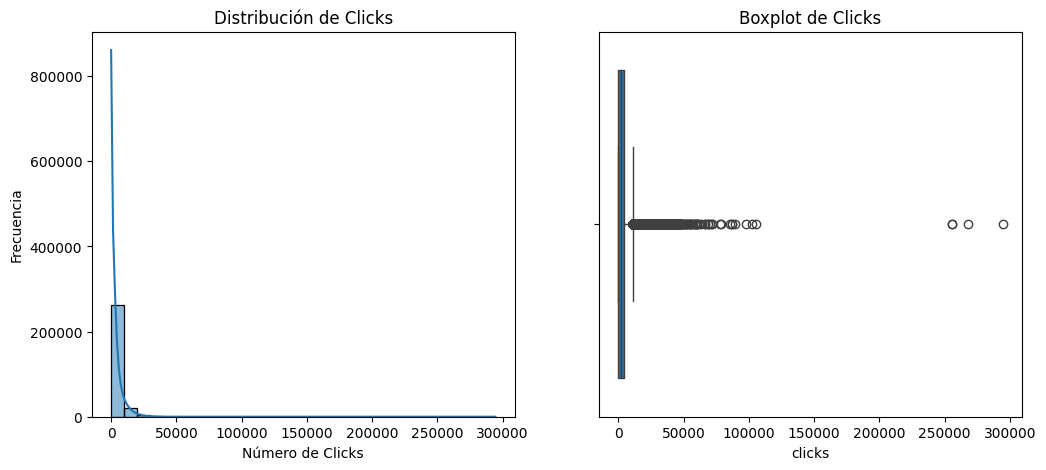

In [5]:
# Filtrar valores válidos (evitamos NaNs y None)
df_valid_clicks = df[df["clicks"].notna() & df["clicks"].apply(lambda x: x is not None)]

plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_valid_clicks["clicks"], bins=30, kde=True)
plt.title("Distribución de Clicks")
plt.xlabel("Número de Clicks")
plt.ylabel("Frecuencia")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_valid_clicks["clicks"])
plt.title("Boxplot de Clicks")

plt.show()

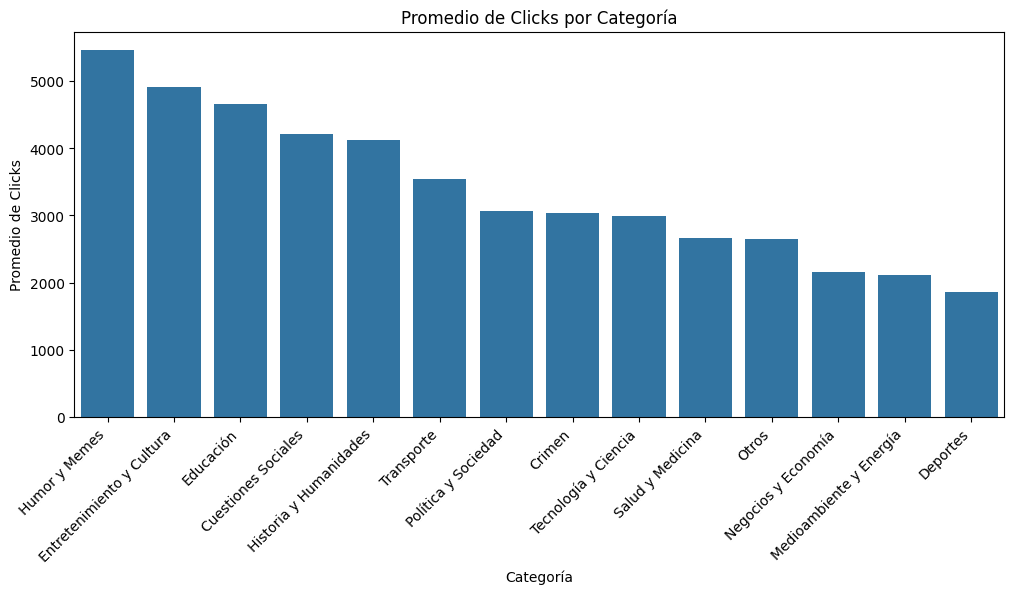

In [6]:
plt.figure(figsize=(12, 5))
df_category = df.groupby("category")["clicks"].mean().sort_values(ascending=False)

sns.barplot(x=df_category.index, y=df_category.values)
plt.xticks(rotation=45, ha="right")
plt.title("Promedio de Clicks por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Promedio de Clicks")
plt.show()

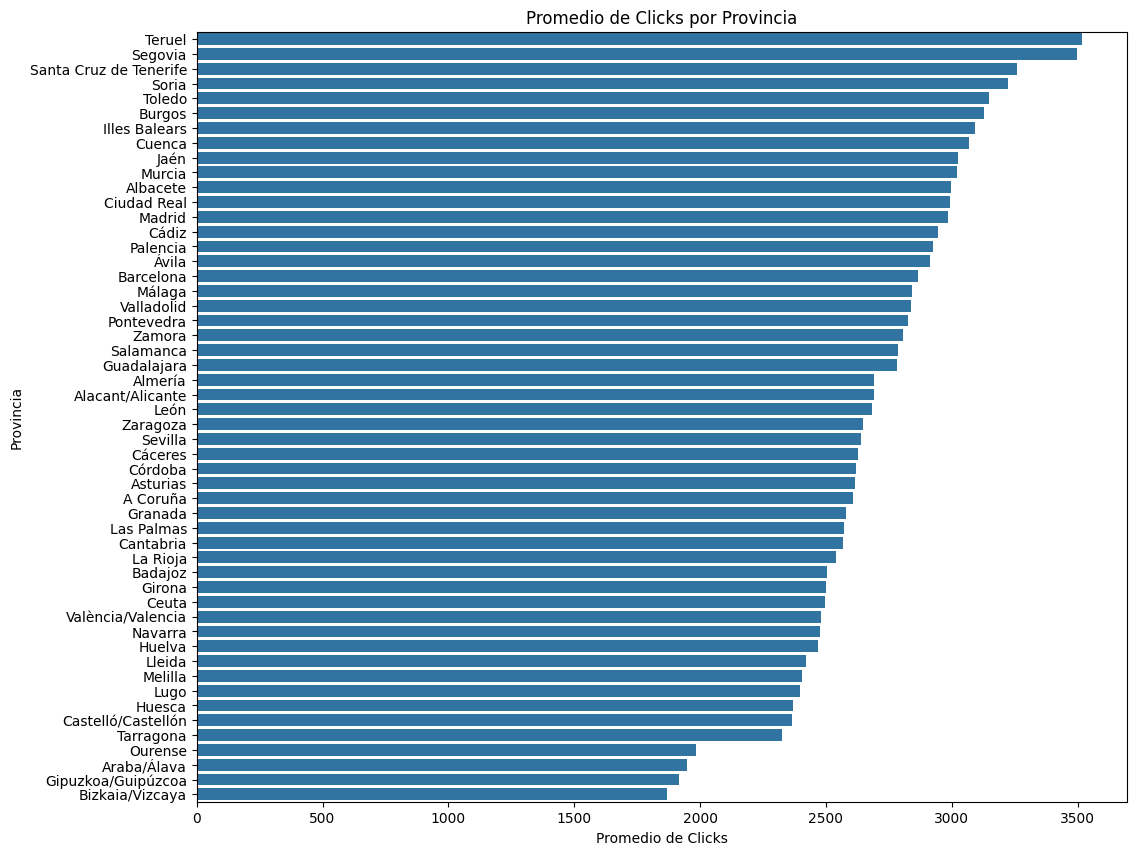

In [7]:
df_provincia = df[df["provincia"] != "Desconocido"].groupby("provincia")["clicks"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(y=df_provincia.index, x=df_provincia.values)
plt.title("Promedio de Clicks por Provincia")
plt.xlabel("Promedio de Clicks")
plt.ylabel("Provincia")
plt.show()

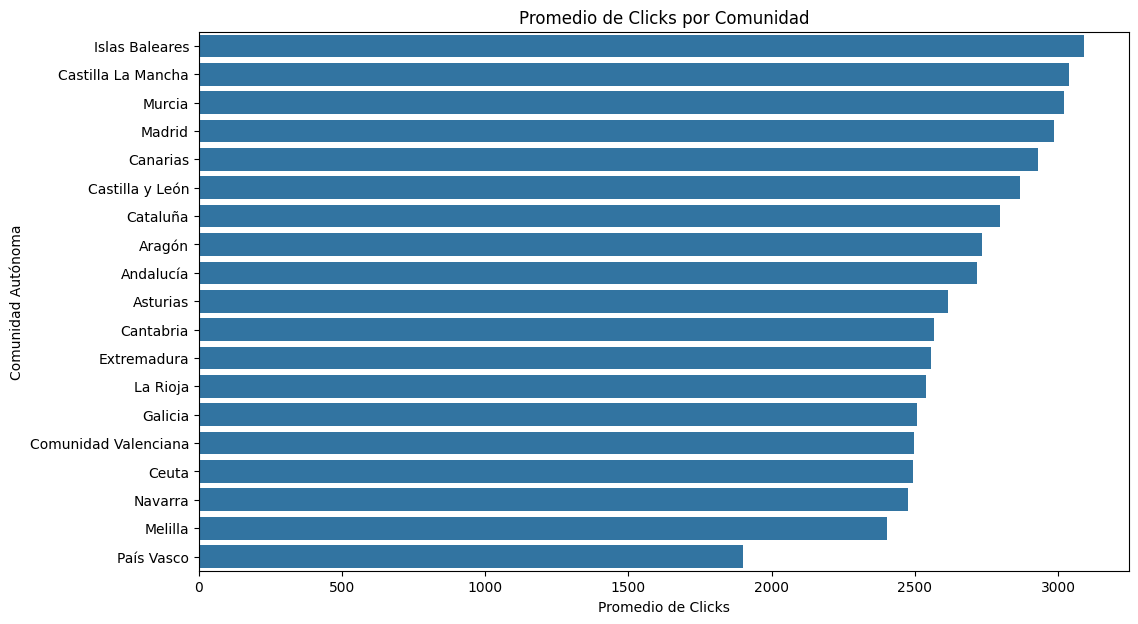

In [8]:
df_comunidad = df[df["comunidad"] != "Desconocido"].groupby("comunidad")["clicks"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(y=df_comunidad.index, x=df_comunidad.values)
plt.title("Promedio de Clicks por Comunidad")
plt.xlabel("Promedio de Clicks")
plt.ylabel("Comunidad Autónoma")
plt.show()


In [9]:
df_sin_clicks = df[(df["clicks"] == 0)]

print(f"Noticias con clicks = 0: {len(df_sin_clicks)}")

Noticias con clicks = 0: 80665


In [10]:
df_con_clicks = df[(df["clicks"] != 0)]

print(f"Noticias con clicks = 0: {len(df_con_clicks)}")

Noticias con clicks = 0: 207048


In [11]:
# graficar numero de clicks antes y despues de pasar el model regressor

In [12]:
df_sin_clicks.head(3)

,news_id,title,content,full_story_link,meneos,clicks,karma,positive_votes,anonymous_votes,negative_votes,category,comments,published_date,user,source,source_link,scraped_date,provincia,comunidad,category_encoded
151323,1045555,¿Existen derechos de propiedad sobre la Luna y...,"Sí, después de un largo debate entre astrónomo...",https://meneame.net/story/existen-derechos-pro...,298,0,522,159,139,4,Negocios y Economía,47,2010-09-11 11:30:02,Tanatos,pulsodigital.net,http://www.pulsodigital.net/2010/09/existen-de...,2025-02-27 11:25:10,NaN,NaN,8.0
151324,1045092,¿El portero más tonto del mundo?,Khalid Askri puede pasar a los anales del depo...,https://meneame.net/story/el-portero-mas-tonto...,978,0,568,373,605,7,Deportes,68,2010-09-10 12:50:02,Ze7eN,elmundodeportivo.es,http://www.elmundodeportivo.es/gen/20100910/54...,2025-02-27 11:25:14,NaN,NaN,2.0
151325,1037095,"Topless: mirar o no mirar, ésa es la cuestión",Acabo de retornar de un roadtrip veraniego. Bi...,https://meneame.net/story/topless-mirar-no-mir...,512,0,635,217,295,3,Entretenimiento y Cultura,95,2010-08-31 19:00:02,Kfn,elreferente.es,http://www.elreferente.es/polmiraflors/topless...,2025-02-27 11:25:53,NaN,NaN,4.0


In [13]:
# Cargar el MinMaxScaler, el OneHotEncoder, y el modelo guardados
regressor_scaler_path = "../00.data/clustering/regressor_scaler.pkl"
regressor_encoder_path = "../00.data/clustering/regressor_encoder.pkl"
ml_regression_path = "../00.data/clustering/ml_regression.pkl"

with open(regressor_scaler_path, "rb") as f:
    scaler = pickle.load(f)

with open(regressor_encoder_path, "rb") as f:
    encoder = pickle.load(f)

with open(ml_regression_path, "rb") as f:
    rf_regressor_model = pickle.load(f)

In [14]:
# **1. Crear una copia sin 'full_story_link' para conservar todas las demás columnas**
df_resultado = df_sin_clicks.drop(columns=['full_story_link'])

In [15]:
features_numericas = ['meneos', 'karma', 'positive_votes', 'anonymous_votes', 'negative_votes', 'comments']
feature_categorica = 'category'

# Verificar que las columnas existen en el DataFrame
if not all(col in df_sin_clicks.columns for col in features_numericas + [feature_categorica]):
    raise ValueError("Faltan columnas necesarias en el DataFrame.")

# Escalar las variables numéricas
df_scaled = scaler.transform(df_sin_clicks[features_numericas])

# Codificar la variable categórica
encoded_categorias = encoder.transform(df_sin_clicks[[feature_categorica]])
encoded_categorias_df = pd.DataFrame(encoded_categorias, columns=encoder.get_feature_names_out([feature_categorica]))

# Unir los datos transformados
df_final = pd.concat([pd.DataFrame(df_scaled, columns=features_numericas), encoded_categorias_df], axis=1)

# Asegurar que las columnas coinciden con las del modelo
df_final = df_final.reindex(columns=rf_regressor_model.feature_names_in_, fill_value=0)

# **3. Predecir los clusters**
df_resultado['clicks'] = rf_regressor_model.predict(df_final)

# **4. Guardar el resultado**
#df_resultado.to_csv("../00.data/clustering/news_with_clicks.csv", index=False)

print("Predicción de clicks completada y guardada.")

Predicción de clicks completada y guardada.


In [16]:
df_resultado.head(3)

,news_id,title,content,meneos,clicks,karma,positive_votes,anonymous_votes,negative_votes,category,comments,published_date,user,source,source_link,scraped_date,provincia,comunidad,category_encoded
151323,1045555,¿Existen derechos de propiedad sobre la Luna y...,"Sí, después de un largo debate entre astrónomo...",298,8.454249,522,159,139,4,Negocios y Economía,47,2010-09-11 11:30:02,Tanatos,pulsodigital.net,http://www.pulsodigital.net/2010/09/existen-de...,2025-02-27 11:25:10,NaN,NaN,8.0
151324,1045092,¿El portero más tonto del mundo?,Khalid Askri puede pasar a los anales del depo...,978,8.434793,568,373,605,7,Deportes,68,2010-09-10 12:50:02,Ze7eN,elmundodeportivo.es,http://www.elmundodeportivo.es/gen/20100910/54...,2025-02-27 11:25:14,NaN,NaN,2.0
151325,1037095,"Topless: mirar o no mirar, ésa es la cuestión",Acabo de retornar de un roadtrip veraniego. Bi...,512,8.832449,635,217,295,3,Entretenimiento y Cultura,95,2010-08-31 19:00:02,Kfn,elreferente.es,http://www.elreferente.es/polmiraflors/topless...,2025-02-27 11:25:53,NaN,NaN,4.0


In [17]:
df_resultado["clicks"] = df_resultado["clicks"].round().astype(int)

In [18]:
df_resultado.head(3)

,news_id,title,content,meneos,clicks,karma,positive_votes,anonymous_votes,negative_votes,category,comments,published_date,user,source,source_link,scraped_date,provincia,comunidad,category_encoded
151323,1045555,¿Existen derechos de propiedad sobre la Luna y...,"Sí, después de un largo debate entre astrónomo...",298,8,522,159,139,4,Negocios y Economía,47,2010-09-11 11:30:02,Tanatos,pulsodigital.net,http://www.pulsodigital.net/2010/09/existen-de...,2025-02-27 11:25:10,NaN,NaN,8.0
151324,1045092,¿El portero más tonto del mundo?,Khalid Askri puede pasar a los anales del depo...,978,8,568,373,605,7,Deportes,68,2010-09-10 12:50:02,Ze7eN,elmundodeportivo.es,http://www.elmundodeportivo.es/gen/20100910/54...,2025-02-27 11:25:14,NaN,NaN,2.0
151325,1037095,"Topless: mirar o no mirar, ésa es la cuestión",Acabo de retornar de un roadtrip veraniego. Bi...,512,9,635,217,295,3,Entretenimiento y Cultura,95,2010-08-31 19:00:02,Kfn,elreferente.es,http://www.elreferente.es/polmiraflors/topless...,2025-02-27 11:25:53,NaN,NaN,4.0


In [19]:
df_final = pd.concat([df_resultado, df_con_clicks], ignore_index=True)
df_final.shape

(287713, 20)

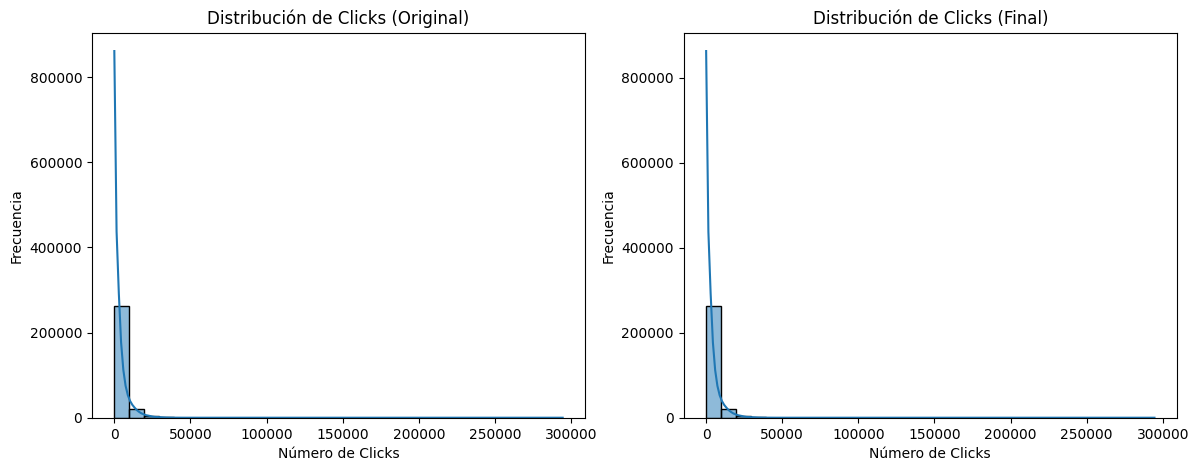

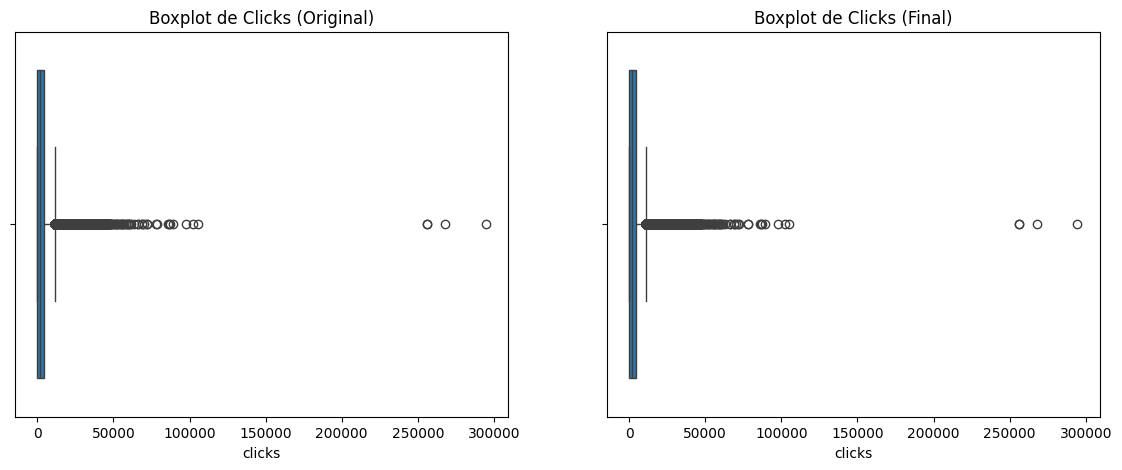

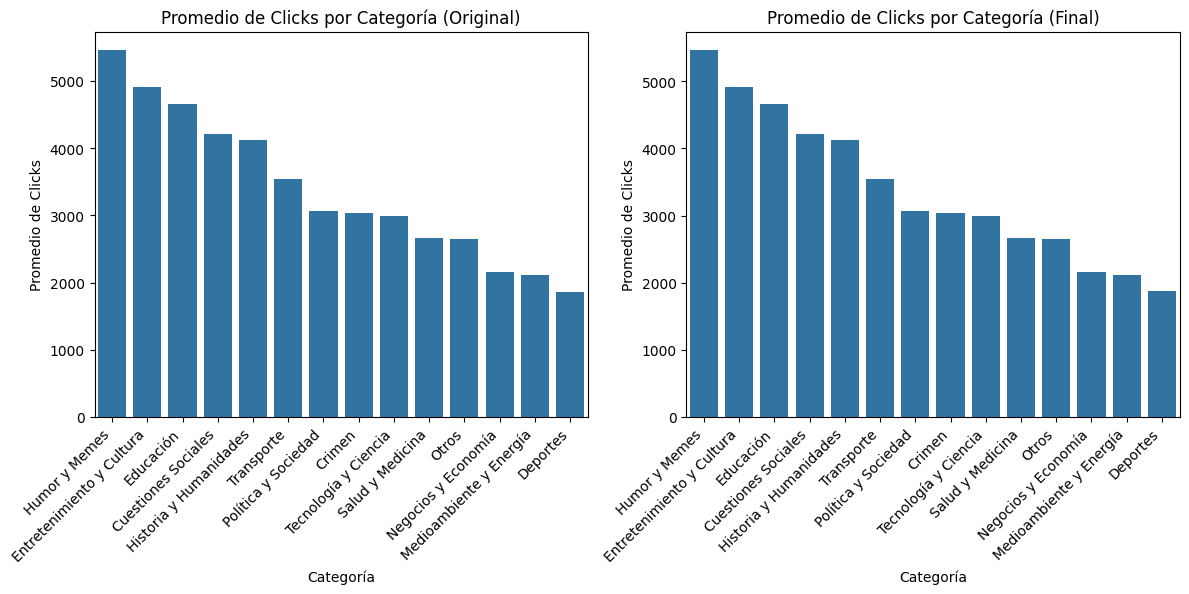

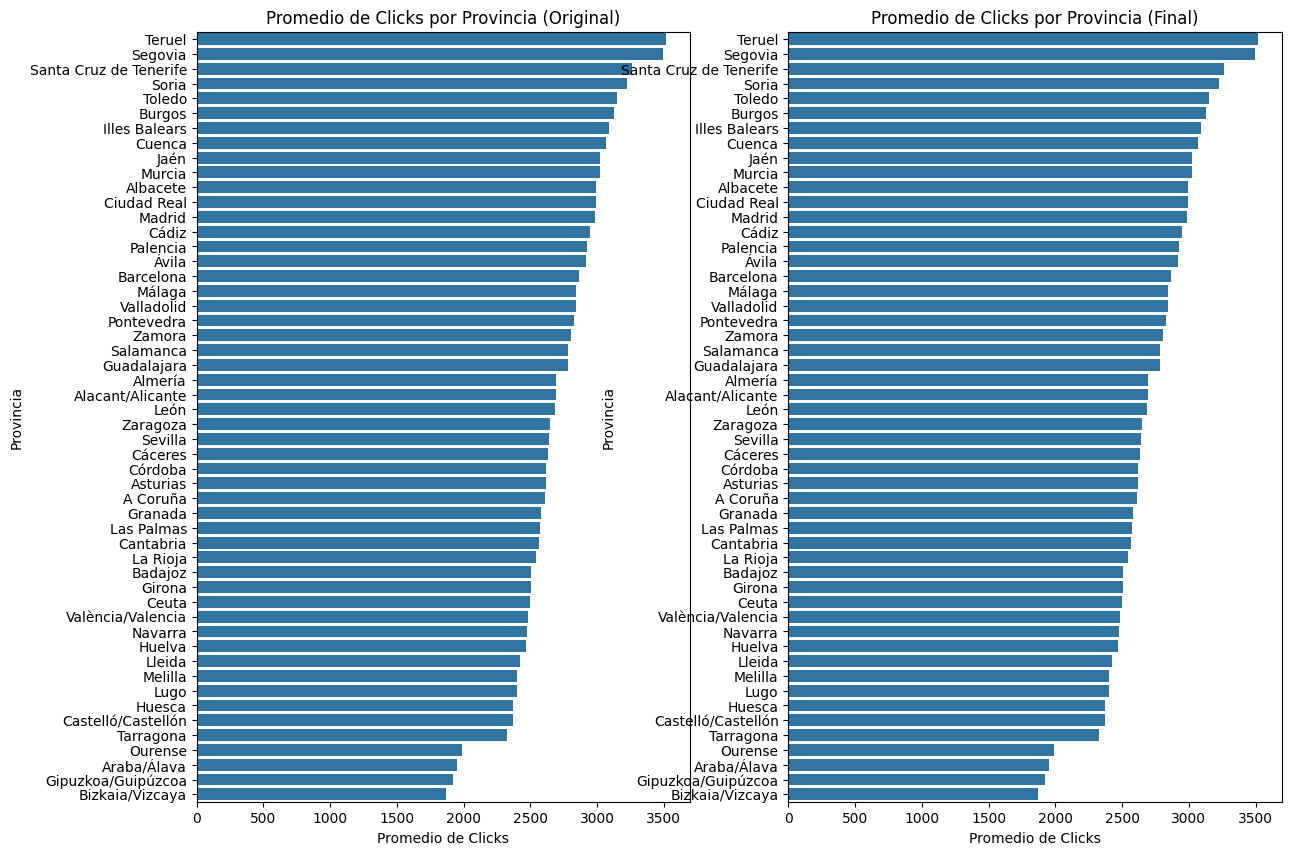

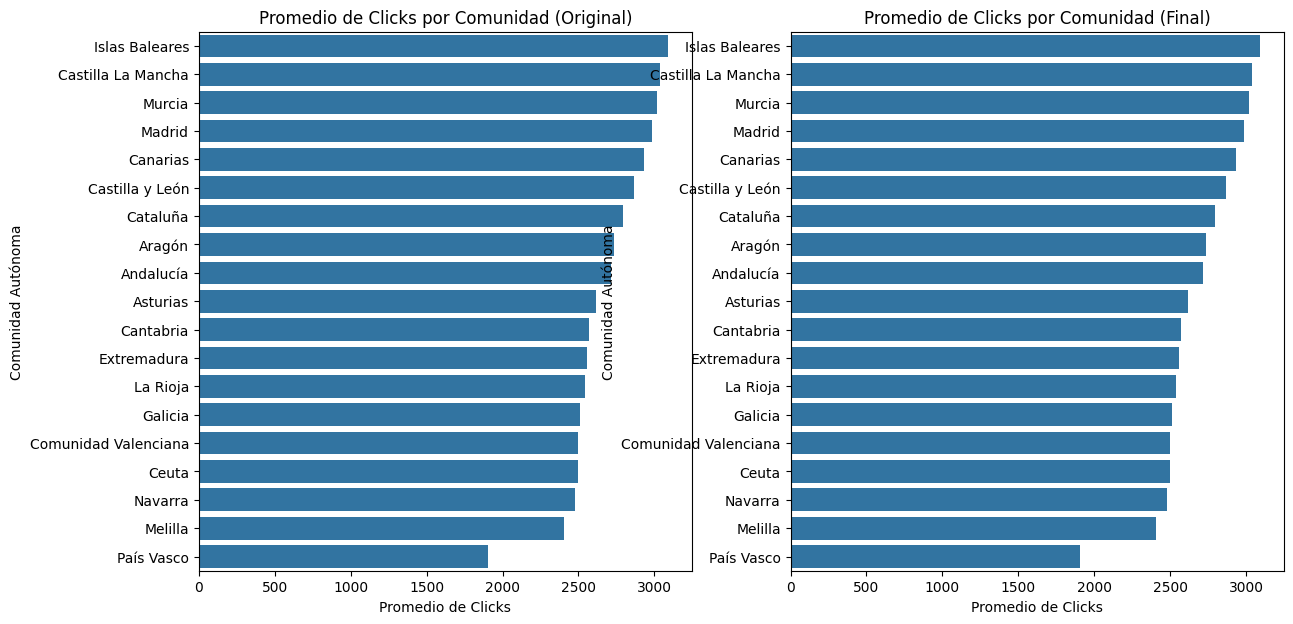

NameError: name 'go' is not defined

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar valores válidos (evitamos NaNs y None)
df_valid_clicks = df[df["clicks"].notna() & df["clicks"].apply(lambda x: x is not None)]
df_valid_final = df_final[df_final["clicks"].notna() & df_final["clicks"].apply(lambda x: x is not None)]

plt.figure(figsize=(14, 5))

# Histograma antes
plt.subplot(1, 2, 1)
sns.histplot(df_valid_clicks["clicks"], bins=30, kde=True)
plt.title("Distribución de Clicks (Original)")
plt.xlabel("Número de Clicks")
plt.ylabel("Frecuencia")

# Histograma después
plt.subplot(1, 2, 2)
sns.histplot(df_valid_final["clicks"], bins=30, kde=True)
plt.title("Distribución de Clicks (Final)")
plt.xlabel("Número de Clicks")
plt.ylabel("Frecuencia")

plt.show()

plt.figure(figsize=(14, 5))

# Boxplot antes
plt.subplot(1, 2, 1)
sns.boxplot(x=df_valid_clicks["clicks"])
plt.title("Boxplot de Clicks (Original)")

# Boxplot después
plt.subplot(1, 2, 2)
sns.boxplot(x=df_valid_final["clicks"])
plt.title("Boxplot de Clicks (Final)")

plt.show()

# Promedio de Clicks por Categoría
df_category = df.groupby("category")["clicks"].mean().sort_values(ascending=False)
df_category_final = df_final.groupby("category")["clicks"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df_category.index, y=df_category.values)
plt.xticks(rotation=45, ha="right")
plt.title("Promedio de Clicks por Categoría (Original)")
plt.xlabel("Categoría")
plt.ylabel("Promedio de Clicks")

plt.subplot(1, 2, 2)
sns.barplot(x=df_category_final.index, y=df_category_final.values)
plt.xticks(rotation=45, ha="right")
plt.title("Promedio de Clicks por Categoría (Final)")
plt.xlabel("Categoría")
plt.ylabel("Promedio de Clicks")

plt.show()

# Promedio de Clicks por Provincia
df_provincia = df[df["provincia"] != "Desconocido"].groupby("provincia")["clicks"].mean().sort_values(ascending=False)
df_provincia_final = df_final[df_final["provincia"] != "Desconocido"].groupby("provincia")["clicks"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))

plt.subplot(1, 2, 1)
sns.barplot(y=df_provincia.index, x=df_provincia.values)
plt.title("Promedio de Clicks por Provincia (Original)")
plt.xlabel("Promedio de Clicks")
plt.ylabel("Provincia")

plt.subplot(1, 2, 2)
sns.barplot(y=df_provincia_final.index, x=df_provincia_final.values)
plt.title("Promedio de Clicks por Provincia (Final)")
plt.xlabel("Promedio de Clicks")
plt.ylabel("Provincia")

plt.show()

# Promedio de Clicks por Comunidad
df_comunidad = df[df["comunidad"] != "Desconocido"].groupby("comunidad")["clicks"].mean().sort_values(ascending=False)
df_comunidad_final = df_final[df_final["comunidad"] != "Desconocido"].groupby("comunidad")["clicks"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(y=df_comunidad.index, x=df_comunidad.values)
plt.title("Promedio de Clicks por Comunidad (Original)")
plt.xlabel("Promedio de Clicks")
plt.ylabel("Comunidad Autónoma")

plt.subplot(1, 2, 2)
sns.barplot(y=df_comunidad_final.index, x=df_comunidad_final.values)
plt.title("Promedio de Clicks por Comunidad (Final)")
plt.xlabel("Promedio de Clicks")
plt.ylabel("Comunidad Autónoma")

plt.show()

# Histograma de Clicks
fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(x=df_valid_clicks["clicks"], nbinsx=30, name="Original", opacity=0.6))
fig_hist.add_trace(go.Histogram(x=df_valid_final["clicks"], nbinsx=30, name="Final", opacity=0.6))

fig_hist.update_layout(
    title="Distribución de Clicks",
    barmode='overlay',
    xaxis_title="Número de Clicks",
    yaxis_title="Frecuencia",
    legend_title="Dataset"
)
fig_hist.show()

# Boxplot de Clicks
fig_box = go.Figure()

fig_box.add_trace(go.Box(y=df_valid_clicks["clicks"], name="Original"))
fig_box.add_trace(go.Box(y=df_valid_final["clicks"], name="Final"))

fig_box.update_layout(
    title="Boxplot de Clicks",
    yaxis_title="Número de Clicks"
)
fig_box.show()

# Promedio de Clicks por Categoría
df_category = df.groupby("category")["clicks"].mean().reset_index()
df_category_final = df_final.groupby("category")["clicks"].mean().reset_index()

fig_category = go.Figure()
fig_category.add_trace(go.Bar(x=df_category["category"], y=df_category["clicks"], name="Original"))
fig_category.add_trace(go.Bar(x=df_category_final["category"], y=df_category_final["clicks"], name="Final"))

fig_category.update_layout(
    title="Promedio de Clicks por Categoría",
    xaxis_title="Categoría",
    yaxis_title="Promedio de Clicks",
    barmode="group",
    xaxis_tickangle=-45
)
fig_category.show()

# Promedio de Clicks por Provincia
df_provincia = df[df["provincia"] != "Desconocido"].groupby("provincia")["clicks"].mean().reset_index()
df_provincia_final = df_final[df_final["provincia"] != "Desconocido"].groupby("provincia")["clicks"].mean().reset_index()

fig_provincia = go.Figure()
fig_provincia.add_trace(go.Bar(y=df_provincia["provincia"], x=df_provincia["clicks"], name="Original", orientation="h"))
fig_provincia.add_trace(go.Bar(y=df_provincia_final["provincia"], x=df_provincia_final["clicks"], name="Final", orientation="h"))

fig_provincia.update_layout(
    title="Promedio de Clicks por Provincia",
    xaxis_title="Promedio de Clicks",
    yaxis_title="Provincia",
    barmode="group"
)
fig_provincia.show()

# Promedio de Clicks por Comunidad
df_comunidad = df[df["comunidad"] != "Desconocido"].groupby("comunidad")["clicks"].mean().reset_index()
df_comunidad_final = df_final[df_final["comunidad"] != "Desconocido"].groupby("comunidad")["clicks"].mean().reset_index()

fig_comunidad = go.Figure()
fig_comunidad.add_trace(go.Bar(y=df_comunidad["comunidad"], x=df_comunidad["clicks"], name="Original", orientation="h"))
fig_comunidad.add_trace(go.Bar(y=df_comunidad_final["comunidad"], x=df_comunidad_final["clicks"], name="Final", orientation="h"))

fig_comunidad.update_layout(
    title="Promedio de Clicks por Comunidad",
    xaxis_title="Promedio de Clicks",
    yaxis_title="Comunidad Autónoma",
    barmode="group"
)
fig_comunidad.show()